# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
assets = {
    "BTC" : 1.2,
    "ETH" : 5.3
}

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
# Add json format to URL
btc_url = btc_url + "?format=json"
# Check response is ok
btc_response = requests.get(btc_url)
btc_response

<Response [200]>

In [6]:
# Fetch current ETH price
# YOUR CODE HERE!
# YOUR CODE HERE!
eth_url = eth_url + "?format=json"
# Check response is ok
eth_response = requests.get(eth_url)
eth_response

<Response [200]>

In [7]:
# Compute current value of my crpto
# YOUR CODE HERE!
# Assign variable values from assets list
my_btc = assets['BTC']
my_eth = assets['ETH']

# Get Btc content from URL and print in json format to identify dictionary structure
btc_content = btc_response.content
btc_data = btc_response.json()
print(json.dumps(btc_data, indent=2))

{
  "data": {
    "1": {
      "id": 1,
      "name": "Bitcoin",
      "symbol": "BTC",
      "website_slug": "bitcoin",
      "rank": 1,
      "circulating_supply": 19351581,
      "total_supply": 19351581,
      "max_supply": 21000000,
      "quotes": {
        "USD": {
          "price": 28813.0,
          "volume_24h": 20356928345,
          "market_cap": 557373846816,
          "percentage_change_1h": 0.344760037470295,
          "percentage_change_24h": -1.49114462364061,
          "percentage_change_7d": -3.6478117023302,
          "percent_change_1h": 0.344760037470295,
          "percent_change_24h": -1.49114462364061,
          "percent_change_7d": -3.6478117023302
        }
      },
      "last_updated": 1681994964
    }
  },
  "metadata": {
    "timestamp": 1681994964,
    "num_cryptocurrencies": 3119,
    "error": null
  }
}


In [8]:
# Assign btc value from btc content
my_btc_value = my_btc*btc_data['data']['1']['quotes']['USD']['price']

In [9]:
# Get Btc content from URL and print in json format to identify dictionary structure
eth_content = eth_response.content
eth_data = eth_response.json()
print(json.dumps(eth_data, indent=2))

{
  "data": {
    "1027": {
      "id": 1027,
      "name": "Ethereum",
      "symbol": "ETH",
      "website_slug": "ethereum",
      "rank": 2,
      "circulating_supply": 120428890,
      "total_supply": 120428890,
      "max_supply": 120428890,
      "quotes": {
        "USD": {
          "price": 1966.49,
          "volume_24h": 12899784041,
          "market_cap": 236612948329,
          "percentage_change_1h": 0.922013152746627,
          "percentage_change_24h": -0.653755141158189,
          "percentage_change_7d": 2.40970347141968,
          "percent_change_1h": 0.922013152746627,
          "percent_change_24h": -0.653755141158189,
          "percent_change_7d": 2.40970347141968
        }
      },
      "last_updated": 1681994971
    }
  },
  "metadata": {
    "timestamp": 1681994971,
    "num_cryptocurrencies": 3119,
    "error": null
  }
}


In [10]:
# Assign btc value from btc content
my_eth_value = my_eth*eth_data['data']['1027']['quotes']['USD']['price']

In [11]:
# # # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $34575.60
The current value of your 5.3 ETH is $10422.40


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Verifiy that the alpaca api and secrey key were correctly loaded
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [14]:
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca_api_object = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [15]:
# Format current date as ISO format
# YOUR CODE HERE!
date = pd.Timestamp('2020-08-07', tz ='America/New_York').isoformat()

In [16]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca_api_object.get_bars(
    tickers,
    timeframe,
    start = date,
    end = date
).df
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.73,119.395,119.43,5559066,15246,119.475306,AGG
2020-08-07 04:00:00+00:00,333.28,334.88,332.300,334.57,57282821,350100,333.800372,SPY


In [17]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_portfolio[df_portfolio['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio = pd.concat(
    [AGG,SPY],
    axis =1,
    keys = ['AGG', 'SPY']
)
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.28  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

In [18]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [19]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16728.50
The current value of your 200 AGG shares is $23886.00


### Savings Health Analysis

In [20]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value  

# Create savings DataFrame
# YOUR CODE HERE!
df_data = {
    'amount' : [crypto,shares]
}
tickers = ['crypto','shares']
df_savings = pd.DataFrame(df_data, index=tickers)
# Display savings DataFrame
df_savings


,amount
crypto,44997.997
shares,40614.500


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

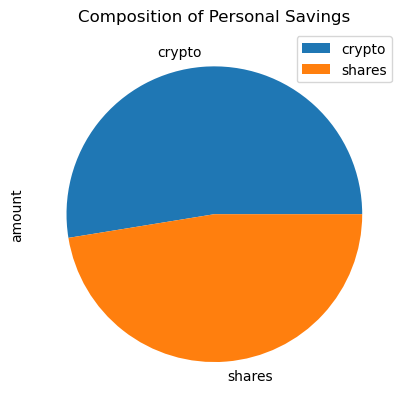

In [21]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(
    title = 'Composition of Personal Savings',
    y='amount'
)

In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto + shares
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund')
elif total_savings == emergency_fund:
    print('Congratulations! You have reached your savings goal')
elif total_savings < emergency_fund:
    print(f'You are ${emergency_fund-total_savings} away from reaching your savings goal')
          

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [39]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [40]:
start_date

'2016-05-01T00:00:00-04:00'

In [55]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_portfolio_5yrs = alpaca_api_object.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
df_portfolio_5yrs.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG


In [60]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG_5yrs = df_portfolio_5yrs[df_portfolio_5yrs['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY_5yrs = df_portfolio_5yrs[df_portfolio_5yrs['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat(
    [AGG_5yrs,SPY_5yrs],
    axis =1,
    keys = ['AGG', 'SPY']
)
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [62]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [64]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty_years.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [65]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 110.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 120.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 130.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 140.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 150.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 160.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 170.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 180.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 190.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 200.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 210.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 220.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 230.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 240.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 250.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 260.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 270.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 280.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 290.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 300.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 310.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 320.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 330.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 340.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 350.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 360.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 370.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 380.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 390.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 400.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 410.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 420.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 430.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 440.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 450.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 460.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 470.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 480.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 490.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008976,1.007514,1.007787,0.999263,1.002240,1.001092,0.991529,1.002375,0.994219,1.015638,...,1.002247,0.992940,0.996965,0.998284,1.001052,0.999289,1.005819,0.989002,0.999612,0.993251
2,1.007292,1.013254,1.014099,1.006445,0.997504,0.992141,1.007277,0.991824,1.010219,1.004350,...,1.005139,0.991189,0.992836,0.996835,1.014335,1.003722,1.014325,0.992521,1.002897,0.994878
3,1.024131,1.009465,1.027893,1.016833,1.008394,1.003575,1.007512,0.997764,1.008635,1.003914,...,1.004373,1.001557,0.990251,0.986095,1.013079,1.002488,1.007745,0.998454,1.001397,0.990801
4,1.014228,1.008370,1.032119,1.023767,1.011873,1.000851,1.007268,0.978325,1.016055,1.009252,...,1.020448,1.003463,0.996055,0.994715,1.016458,1.007564,1.016623,1.009978,1.012621,0.986052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,26.620193,33.108446,11.480856,22.126851,20.168918,30.550880,4.802038,9.447744,7.927687,24.728215,...,8.615824,33.503633,30.773884,6.533568,16.644224,16.325712,3.739249,33.119054,30.925916,18.086309
7557,26.642703,33.219274,11.404923,22.251040,19.919041,30.664281,4.861392,9.460445,7.907206,24.680769,...,8.647670,33.470407,30.822550,6.523283,16.502490,16.197321,3.736816,32.875146,30.954047,18.119382
7558,26.525686,32.920233,11.476772,22.335746,19.910758,30.484370,4.846265,9.447299,7.988606,24.602773,...,8.657086,33.483076,30.808929,6.625308,16.623009,16.164012,3.808823,32.972290,30.940059,18.183091
7559,26.389377,33.122926,11.427949,22.394499,20.173022,30.595172,4.862239,9.352577,7.907249,24.675319,...,8.653587,33.527756,30.896266,6.625907,16.780289,16.194900,3.797720,32.803206,30.916741,18.138031


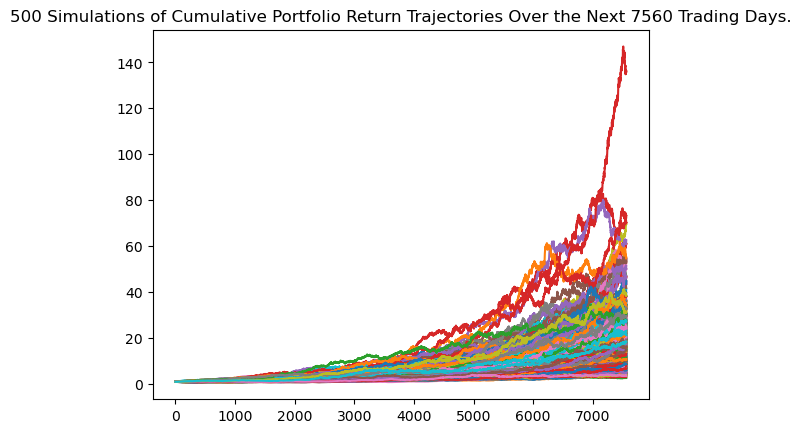

In [66]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirty_years.plot_simulation()

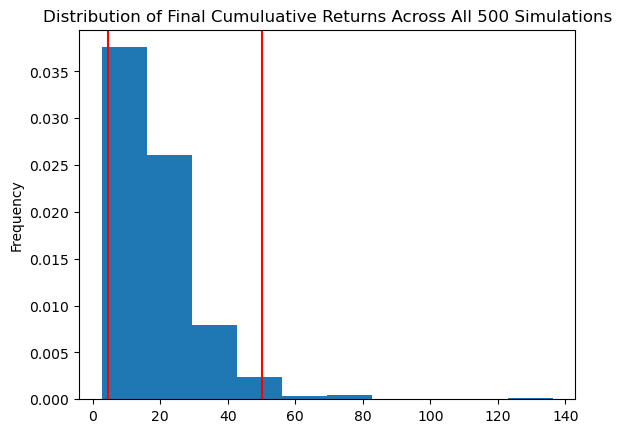

In [67]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirty_years.plot_distribution()

### Retirement Analysis

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats = MC_thirty_years.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
stats

C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean             18.445071
std              12.552510
min               2.627795
25%               9.776140
50%              15.854561
75%              24.198379
max             136.212068
95% CI Lower      4.351055
95% CI Upper     50.110725
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [79]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = initial_investment * stats['95% CI Lower']
ci_upper = initial_investment * stats['95% CI Upper']
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.2f} and ${ci_upper:.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $87021.10 and $1002214.49


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [80]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = initial_investment * stats['95% CI Lower']
ci_upper = initial_investment * stats['95% CI Upper']
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.2f} and ${ci_upper:.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $130531.64 and $1503321.74


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [81]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2,0.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [84]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 110.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 120.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 130.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 140.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 150.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 160.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 170.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 180.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 190.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 200.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 210.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 220.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 230.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 240.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 250.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 260.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 270.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 280.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 290.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 300.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 310.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 320.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 330.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 340.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 350.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 360.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 370.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 380.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 390.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 400.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 410.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 420.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 430.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 440.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 450.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 460.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 470.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 480.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 490.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000310,0.997875,0.991744,1.006480,0.980566,0.991808,0.997830,1.003219,0.999722,0.999712,...,1.003984,0.997267,1.005118,0.998691,0.998375,0.992170,1.003395,1.004777,1.012337,1.002025
2,0.993688,1.000929,0.991064,0.993868,0.974402,0.995643,0.988471,1.004247,0.997791,0.994733,...,1.017388,1.011089,0.998180,1.001381,1.001133,0.991440,0.996761,1.003636,1.020280,0.985387
3,0.992060,1.009013,0.981510,0.993999,0.979431,0.991123,1.004382,0.999017,0.994669,0.988112,...,1.018694,1.002544,1.019951,0.984041,1.019425,0.997257,0.998295,1.012179,1.028521,0.987111
4,1.001504,1.007926,0.978246,0.984467,0.974042,0.999316,1.011218,0.990846,0.984773,0.984908,...,1.018957,1.012578,1.021071,0.988906,1.014056,1.008146,0.997656,1.013614,1.026096,0.977135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,29.134314,9.262000,8.352251,6.828730,8.435774,16.913910,11.621282,26.892160,12.615351,15.447498,...,13.726151,23.153476,15.344294,19.876068,10.180557,15.769462,40.057042,27.789638,22.176714,31.214749
7557,28.991224,9.359946,8.264204,6.783857,8.448014,16.989614,11.593989,26.851584,12.592048,15.429838,...,13.737502,23.068822,15.275166,20.078088,10.230171,15.795718,40.021754,27.653760,22.498025,31.499046
7558,29.188466,9.354724,8.228419,6.754812,8.476132,17.081788,11.430546,26.722505,12.606482,15.553824,...,13.761061,22.977834,15.333847,19.892461,10.302811,15.779174,40.435770,27.634868,22.406459,31.617519
7559,29.044202,9.343331,8.322980,6.758868,8.391350,17.258072,11.496369,26.708030,12.753667,15.719228,...,13.615457,22.785271,15.274417,19.872788,10.357213,15.866564,39.875551,27.762412,22.467072,31.802577


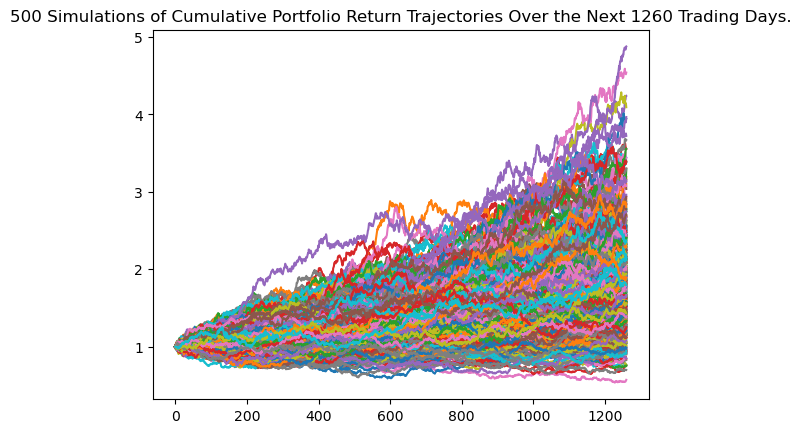

In [87]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_5 = MC_five_years.plot_simulation()

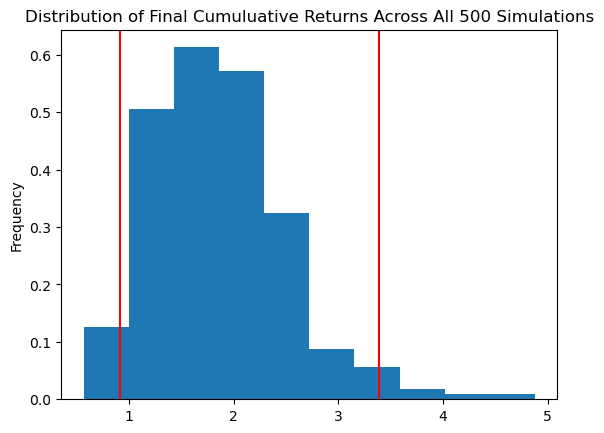

In [89]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_5 = MC_five_years.plot_distribution()

In [90]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats_5 = MC_five_years.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
stats_5

C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              1.869731
std               0.634618
min               0.571306
25%               1.412208
50%               1.818217
75%               2.222731
max               4.878388
95% CI Lower      0.915169
95% CI Upper      3.393421
Name: 1260, dtype: float64

In [93]:
# Set initial investment
# YOUR CODE HERE!
investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = investment * stats_5['95% CI Lower']
ci_upper_five = investment * stats_5['95% CI Upper']
# Print results
print(f"There is a 95% chance that an initial investment of ${investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:.2f} and ${ci_upper_five:.2f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54910.11 and $203605.29


### Ten Years Retirement Option

In [94]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2,0.8],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [95]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 110.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 120.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 130.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 140.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 150.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 160.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 170.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 180.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 190.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 200.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 210.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 220.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 230.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 240.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 250.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 260.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 270.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 280.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 290.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 300.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 310.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 320.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 330.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 340.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 350.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 360.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 370.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 380.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 390.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 400.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 410.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 420.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 430.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 440.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 450.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 460.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 470.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 480.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

Running Monte Carlo simulation number 490.


C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982187,0.978390,1.016635,0.992238,0.995407,0.999875,1.001734,0.984527,0.999250,0.996479,...,1.003696,1.000847,1.003167,1.005323,1.013711,0.994784,1.006716,1.002894,0.991905,0.995561
2,0.990746,0.984999,1.023158,0.979202,0.999352,0.999592,1.003390,0.974917,1.000554,0.983729,...,1.005273,0.997269,1.004294,1.001068,1.008543,0.984183,1.016278,1.004208,0.978862,0.990624
3,1.006386,0.984729,1.021720,0.997700,0.999638,0.999904,1.005805,0.986569,1.002905,0.991967,...,1.008954,0.996801,1.001549,0.999732,0.998846,0.993251,1.009444,1.005914,0.972316,0.993993
4,1.022885,0.980231,1.007612,1.005654,0.997143,1.001261,1.005682,0.972613,0.996122,0.994460,...,0.996896,0.986844,0.996481,1.003644,0.985424,0.996376,1.020239,0.998599,0.970629,0.989543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.397111,3.159451,1.289630,2.184966,2.602413,5.285592,1.902942,2.049476,8.826934,3.288146,...,2.282496,3.989849,2.779346,6.454217,5.472360,5.779192,2.802319,1.792978,1.822204,3.487694
2517,3.477148,3.179260,1.283197,2.189606,2.627822,5.261286,1.892070,2.033474,8.965658,3.290735,...,2.278644,3.960327,2.824549,6.552265,5.429571,5.724717,2.837515,1.769594,1.839214,3.471722
2518,3.478359,3.171557,1.262825,2.190040,2.608825,5.221526,1.862648,2.030632,8.860164,3.309868,...,2.239102,3.897502,2.833521,6.456739,5.452640,5.733382,2.845638,1.781952,1.844649,3.488708
2519,3.474423,3.170831,1.276185,2.214979,2.609230,5.248004,1.882745,2.035972,8.892623,3.279419,...,2.187856,3.923668,2.829231,6.485637,5.442027,5.718303,2.858471,1.797242,1.854728,3.478032


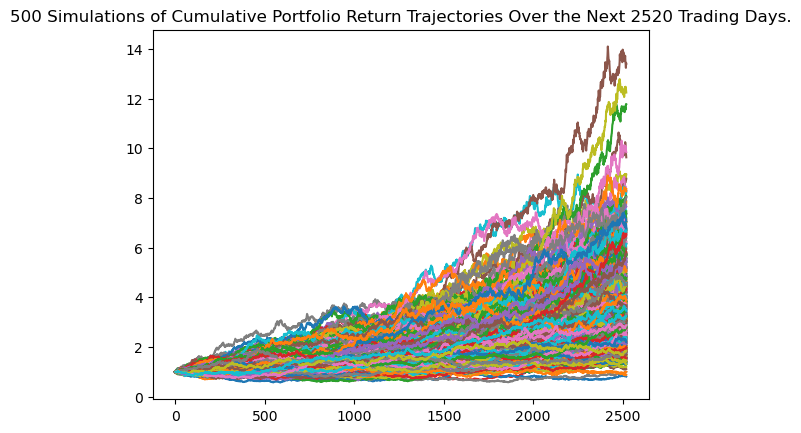

In [96]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_10 = MC_ten_years.plot_simulation()

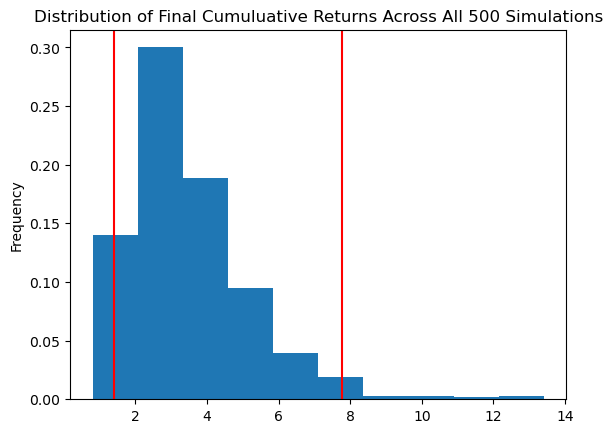

In [97]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_10 = MC_ten_years.plot_distribution()

In [98]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats_10 = MC_ten_years.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
stats_10

C:\Users\Lenovo\Desktop\FinTech University\Scripts\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              3.564018
std               1.723370
min               0.807889
25%               2.409925
50%               3.164639
75%               4.425087
max              13.404629
95% CI Lower      1.403566
95% CI Upper      7.767847
Name: 2520, dtype: float64

In [99]:
# Set initial investment
# YOUR CODE HERE!
investment_10 = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = investment_10 * stats_10['95% CI Lower']
ci_upper_ten = investment_10 * stats_10['95% CI Upper']
# Print results
print(f"There is a 95% chance that an initial investment of ${investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:0.2f} and ${ci_upper_ten:0.2f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $84213.95 and $466070.79


In [100]:
print('Investing $60,000 over the next ten years will return between $84,000 and $466,000. In reference to the monthly income of $12,000, this falls between 7 months, at worst case, and approx 39 months (~ 3.25 years). This indicates that the investment yields returns that are not sufficient for early retirement')

Investing $60,000 over the next ten years will return between $84,000 and $466,000. In reference to the monthly income of $12,000, this falls between 7 months, at worst case, and approx 39 months (~ 3.25 years). This indicates that the investment yields returns that are not sufficient for early retirement
